In [2]:
#!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math


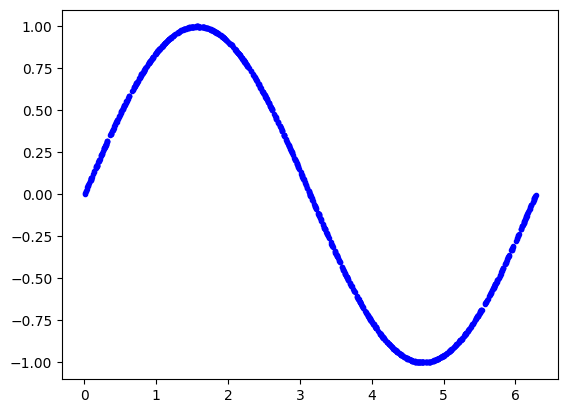

In [3]:
SAMPLES = 1000

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

np.random.shuffle(x_values)

y_values = np.sin(x_values)

plt.plot(x_values, y_values, 'b.')

plt.show()


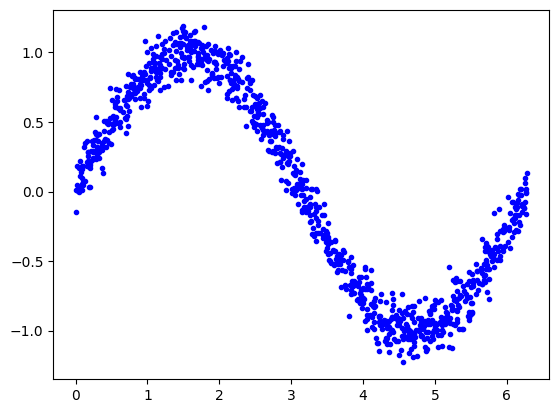

In [4]:
y_values += 0.1*np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()
         

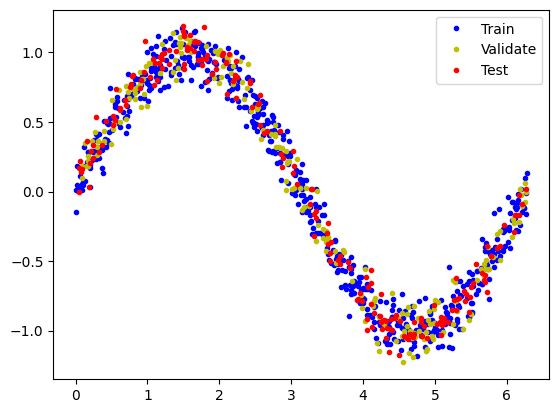

In [5]:
TRAIN_SPLIT = int(0.6 *SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert  (x_train.size + x_validate.size +x_test.size)  == SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate,y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")

plt.legend()
plt.show()


In [6]:
from tensorflow.keras import layers

model_1 = tf.keras.Sequential()

model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()

C:\ProgramData\anaconda3\envs\tensor_workspace\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_validate, y_validate))


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1532 - mae: 0.3143 - val_loss: 0.1599 - val_mae: 0.3215
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1532 - mae: 0.3143 - val_loss: 0.1599 - val_mae: 0.3214
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1532 - mae: 0.3142 - val_loss: 0.1599 - val_mae: 0.3214
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1532 - mae: 0.3142 - val_loss: 0.1599 - val_mae: 0.3213
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1532 - mae: 0.3142 - val_loss: 0.1598 - val_mae: 0.3213
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1532 - mae: 0.3141 - val_loss: 0.1598 - val_mae: 0.3212
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1532 - mae: 0.3141 - val_loss: 0.1598 - val_mae: 0.3212
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1531 - mae: 0.3140 - val_loss: 0.1598 - val_mae: 0.3211
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.153

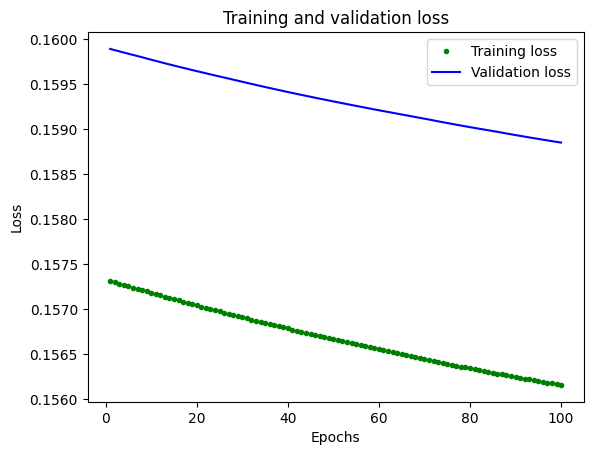

In [9]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


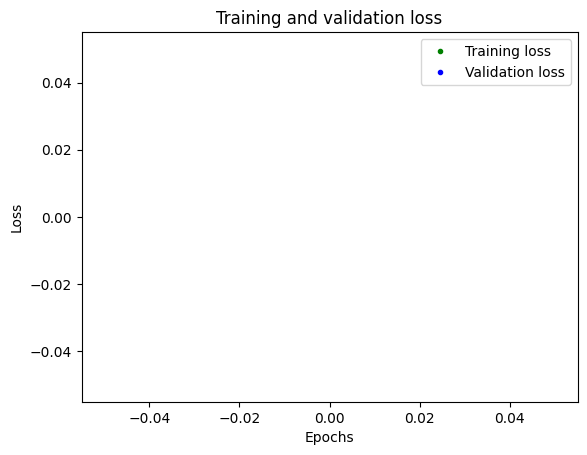

In [10]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

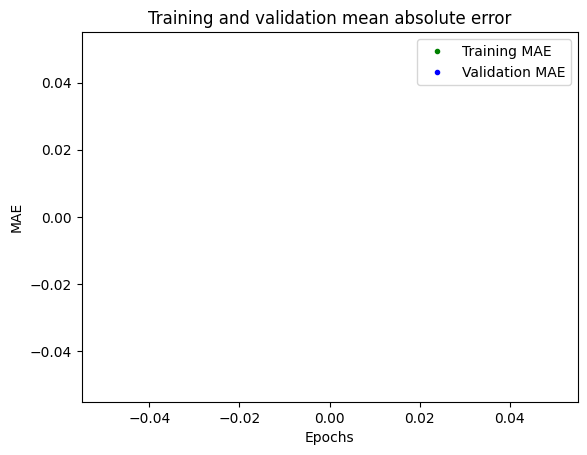

In [11]:
# Draw a graph of mean absolute error,# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


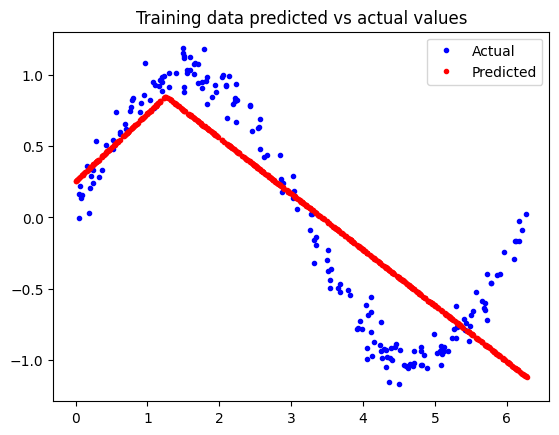

In [12]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
#Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [13]:


model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6134 - mae: 0.6978 - val_loss: 0.4903 - val_mae: 0.6213
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4296 - mae: 0.5801 - val_loss: 0.3879 - val_mae: 0.5415
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3397 - mae: 0.5082 - val_loss: 0.3128 - val_mae: 0.4809
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2783 - mae: 0.4588 - val_loss: 0.2498 - val_mae: 0.4316
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2231 - mae: 0.4166 - val_loss: 0.2071 - val_mae: 0.3977
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1909 - mae: 0.3898 - val_loss: 0.1834 - val_mae: 0.3745
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1721 - mae: 0.3709 - val_loss: 0.1706 - val_mae: 0.3607
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1612 - mae: 0.3576 - val_loss: 0.1627 - val_mae: 0.3521
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.153

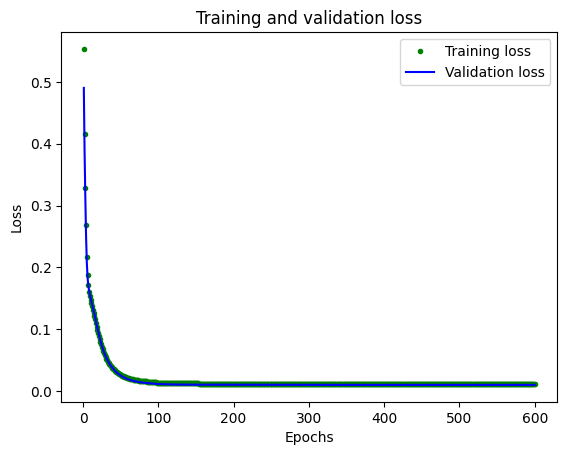

In [16]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


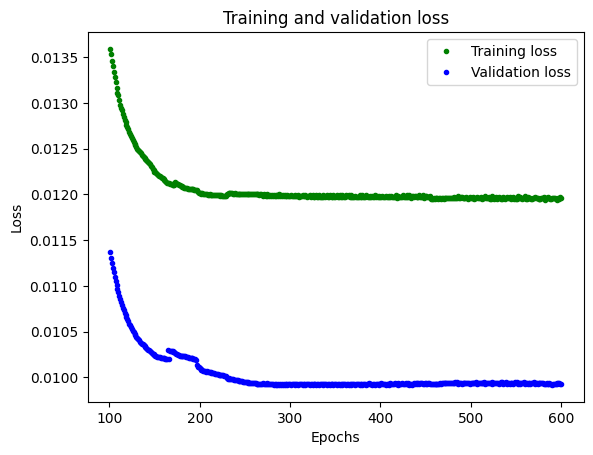

In [17]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

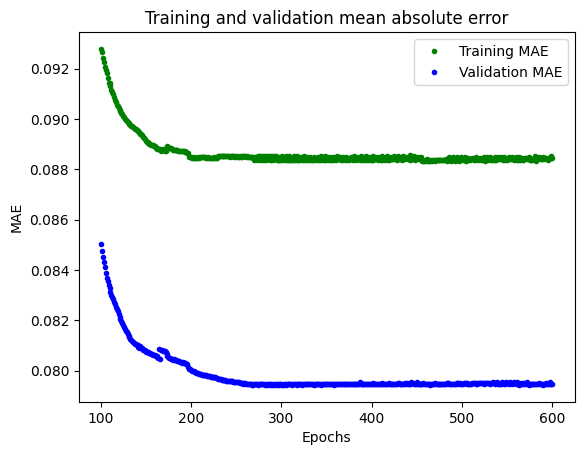

In [18]:
plt.clf()
# Draw a graph of mean absolute error,# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0088 - mae: 0.0699
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


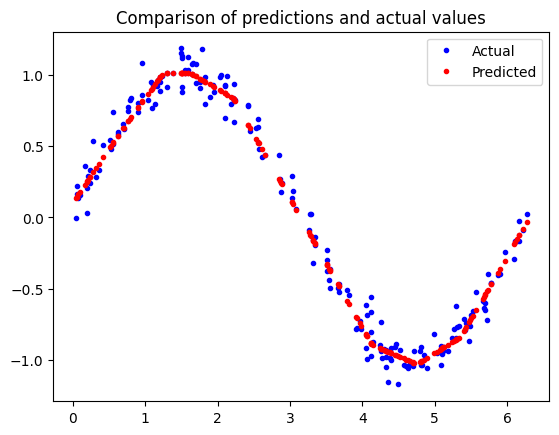

In [20]:
loss = model_2.evaluate(x_test, y_test)
predictions = model_2.predict(x_test)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')

plt.legend()
plt.show()